In [18]:
class Model(object):
    def __init__(self):
    # Initialize the weights to `2.0` and the bias to `1.0`
    # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
        self.w = tf.Variable(2.0)
        self.b = tf.Variable(1.0)

    def __call__(self, x):
        return self.w * x + self.b

model = Model()

In [9]:
import tensorflow as tf 

TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs  = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

In [19]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
  plt.show()

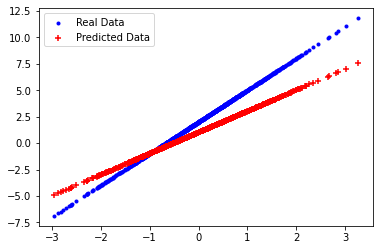

Current loss: 1.962606


In [20]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

In [21]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [22]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss(outputs, model(inputs))
    dw, db = tape.gradient(current_loss, [model.w, model.b])

    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

In [23]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=1.00, loss=1.96261
Epoch  1: w=2.19 b=1.20, loss=1.26763
Epoch  2: w=2.35 b=1.36, loss=0.81883
Epoch  3: w=2.47 b=1.49, loss=0.52897
Epoch  4: w=2.57 b=1.59, loss=0.34175
Epoch  5: w=2.66 b=1.67, loss=0.22081
Epoch  6: w=2.72 b=1.74, loss=0.14269
Epoch  7: w=2.78 b=1.79, loss=0.09221
Epoch  8: w=2.82 b=1.83, loss=0.05959
Epoch  9: w=2.85 b=1.87, loss=0.03852
Epoch 10: w=2.88 b=1.89, loss=0.02490
Epoch 11: w=2.90 b=1.91, loss=0.01610
Epoch 12: w=2.92 b=1.93, loss=0.01041
Epoch 13: w=2.94 b=1.95, loss=0.00673
Epoch 14: w=2.95 b=1.96, loss=0.00435


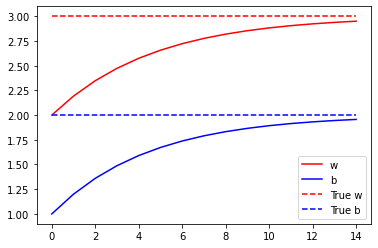

In [24]:
import matplotlib.pyplot as plt 
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')

plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')

plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

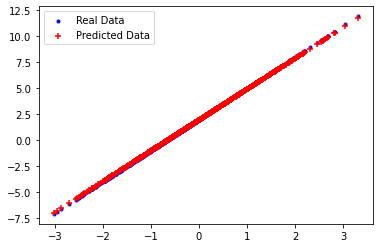

In [25]:
test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

Visualize the cost function against the values of each of the trainable weights the model approximated to over time.

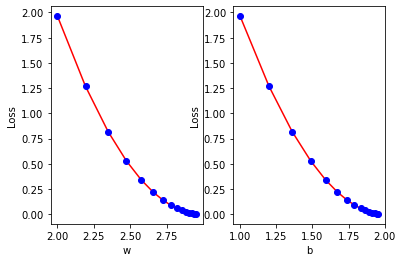

In [26]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)